# Random Forests

In [3]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from acquire import get_titanic_data
from prepare import prep_titanic

df = prep_titanic(get_titanic_data())
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
passenger_id       891 non-null int64
survived           891 non-null int64
pclass             891 non-null int64
sex                891 non-null object
age                714 non-null float64
sibsp              891 non-null int64
parch              891 non-null int64
fare               891 non-null float64
embarked           891 non-null object
class              891 non-null object
embark_town        889 non-null object
alone              891 non-null int64
embarked_town      891 non-null object
embarked_encode    891 non-null int64
dtypes: float64(2), int64(7), object(5)
memory usage: 97.5+ KB


In [28]:
# Handle missing age values
df.dropna(inplace=True)

X = df[['pclass','age','fare','sibsp','parch']]
y = df.survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

X_train.head()

,pclass,age,fare,sibsp,parch
605,3,36.0,15.5500,1,0
197,3,42.0,8.4042,0,1
56,2,21.0,10.5000,0,0
645,1,48.0,76.7292,1,0
356,1,22.0,55.0000,0,1


In [5]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=3, 
                            random_state=123)

In [6]:
rf.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [7]:
print(rf.feature_importances_)


[0.26933808 0.18440829 0.43423086 0.07393138 0.03809139]


In [8]:
y_pred = rf.predict(X_train)


In [9]:
y_pred_proba = rf.predict_proba(X_train)


In [10]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.75


In [11]:
print(confusion_matrix(y_train, y_pred))


[[268  31]
 [ 94 105]]


In [12]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.74      0.90      0.81       299
           1       0.77      0.53      0.63       199

   micro avg       0.75      0.75      0.75       498
   macro avg       0.76      0.71      0.72       498
weighted avg       0.75      0.75      0.74       498



In [13]:
print('Accuracy of random forest classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.68


# K-Nearest Neighbor


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [18]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')


In [19]:
knn.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [20]:
y_pred = knn.predict(X_train)


In [21]:
y_pred_proba = knn.predict_proba(X_train)


In [22]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.79


In [23]:
print(confusion_matrix(y_train, y_pred))


[[252  47]
 [ 57 142]]


In [24]:
print(classification_report(y_train, y_pred))


              precision    recall  f1-score   support

           0       0.82      0.84      0.83       299
           1       0.75      0.71      0.73       199

   micro avg       0.79      0.79      0.79       498
   macro avg       0.78      0.78      0.78       498
weighted avg       0.79      0.79      0.79       498



In [25]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.64


([<matplotlib.axis.XTick at 0x1a175d2eb8>,
 <a list of 5 Text xticklabel objects>)

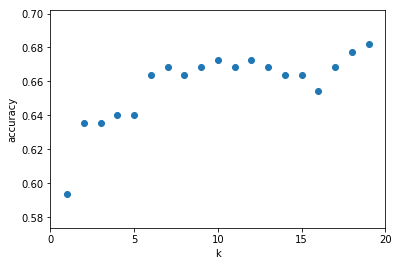

In [26]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

In [27]:
%store knn


Stored 'knn' (KNeighborsClassifier)
